<a href="https://colab.research.google.com/github/alex-smith-uwec/CS-420/blob/main/markov/Three_states.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple MDP with three states.
Actions "a" and "b" available in each state.

*   can think of "a" as clockwise and "b" as counterclockwise.
*   no terminal state
*   deterministic (all transition probabilities 1 or 0)




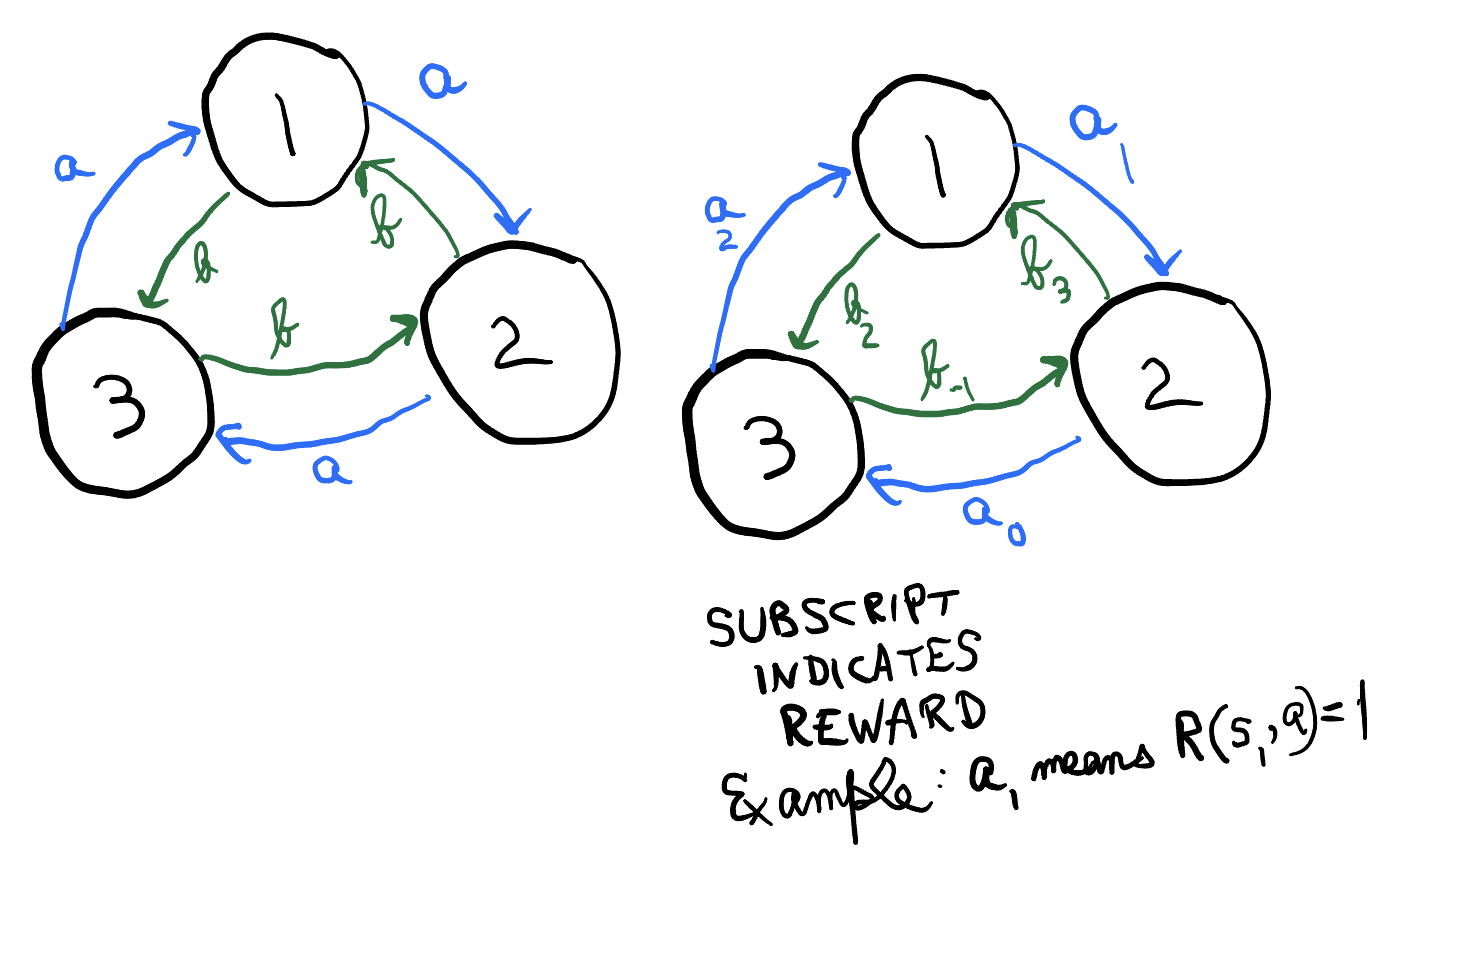

The purpose of this notebook is to illustrate value iteration in this simple MDP. We initialze values as 0 then update by the Bellman scheme.




 $$V(s) \leftarrow \max_{a \in A} \left[ R(s, a) + \gamma \sum_{s'} P(s' | s, a) V(s') \right]$$


In [ ]:
import numpy as np

In [ ]:
# Adjusting for states indexed 1, 2, 3
# Note: T and R will have dimensions [4, 4, 2] but we will not use index 0
T = np.zeros((4, 4, 2))
R = np.zeros((4, 4, 2))

# Transition probabilities
T[1, 2, 0] = 1  # From s1 to s2 under a
T[1, 3, 1] = 1  # From s1 to s3 under b
T[2, 3, 0] = 1  # From s2 to s3 under a
T[2, 1, 1] = 1  # From s2 to s1 under b
T[3, 1, 0] = 1  # From s3 to s1 under a
T[3, 2, 1] = 1  # From s3 to s2 under b

# Rewards
R[1, 2, 0] = 1  # Reward from s1 to s2 under a
R[1, 3, 1] = 2  # Reward from s1 to s3 under b
R[2, 3, 0] = 0  # Reward from s2 to s3 under a
R[2, 1, 1] = 3  # was 3 Reward from s2 to s1 under b
R[3, 1, 0] = 2  # Reward from s3 to s1 under a
R[3, 2, 1] = -1 # Reward from s3 to s2 under b

# Value function initialized to zeros (ignoring index 0)
V = np.zeros(4)

# Discount factor
gamma = 0.9

# Value iteration
for i in range(100):  # Run for 100 iterations
    V_new = np.zeros(4)
    for s in range(1, 4):  # Loop through each state, starting from 1
        q_values = []
        for a in range(2):  # Loop through each action
            q_value = 0
            for s_next in range(1, 4):  # Loop through each next state, starting from 1
                q_value += T[s, s_next, a] * (R[s, s_next, a] + gamma * V[s_next])
            q_values.append(q_value)
        V_new[s] = max(q_values)  # Bellman optimality equation
    V = V_new
    print(f"Iteration {i+1}: Value Function = {V[1:]}")

print("Final Value Function:", V[1:])


Iteration 1: Value Function = [2. 5. 2.]
Iteration 2: Value Function = [5.5 6.8 3.8]
Iteration 3: Value Function = [7.12 8.42 6.95]
Iteration 4: Value Function = [ 8.578 11.255  8.408]
Iteration 5: Value Function = [11.1295 12.5672  9.7202]
Iteration 6: Value Function = [12.31048 13.74818 12.01655]
Iteration 7: Value Function = [13.373362 15.814895 13.079432]
Iteration 8: Value Function = [15.2334055 16.7714888 14.0360258]
Iteration 9: Value Function = [16.09433992 17.63242322 15.71006495]
Iteration 10: Value Function = [16.8691809  19.13905846 16.48490593]
Iteration 11: Value Function = [18.22515261 19.83641534 17.18226281]
Iteration 12: Value Function = [18.8527738  20.46403653 18.40263735]
Iteration 13: Value Function = [19.41763287 21.56237361 18.96749642]
Iteration 14: Value Function = [20.40613625 22.07074678 19.47586959]
Iteration 15: Value Function = [20.8636721  22.52828263 20.36552263]
Iteration 16: Value Function = [21.27545437 23.32897036 20.77730489]
Iteration 17: Value Fu

In [ ]:
# Initialize policy with zeros (ignoring index 0)
policy = np.zeros(4, dtype=int)

# Extract the optimal policy
for s in range(1, 4):  # Loop through each state, starting from 1
    q_values = []
    for a in range(2):  # Loop through each action
        q_value = 0
        for s_next in range(1, 4):  # Loop through each next state, starting from 1
            q_value += T[s, s_next, a] * (R[s, s_next, a] + gamma * V[s_next])
        q_values.append(q_value)
    policy[s] = np.argmax(q_values)  # Greedy action for this state

print("Optimal Policy:", policy[1:])
print("0 means action a and 1 means action b")

Optimal Policy: [0 0 0]
0 means action a and 1 means action b
